In [4]:
import mlxtend
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r"C:\Users\mobin\DATASIENCE\Association Rules\Titanic.csv")

In [6]:
df.head()

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     2201 non-null   object
 1   Gender    2201 non-null   object
 2   Age       2201 non-null   object
 3   Survived  2201 non-null   object
dtypes: object(4)
memory usage: 68.9+ KB


In [8]:
df['Class'].value_counts()

Class
Crew    885
3rd     706
1st     325
2nd     285
Name: count, dtype: int64

In [9]:
df_dum = pd.get_dummies(df , dtype=int)

In [10]:
df_dum.head()

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Gender_Female,Gender_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,0,0,1,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,1,1,0
2,0,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,1,1,0
4,0,0,1,0,0,1,0,1,1,0


# APRIORI ALGORITHM

In [11]:
freq_items = apriori(df_dum , min_support= 0.05 , use_colnames=True)
freq_items

,support,itemsets
0,0.147660,(Class_1st)
1,0.129487,(Class_2nd)
2,0.320763,(Class_3rd)
3,0.402090,(Class_Crew)
4,0.213539,(Gender_Female)
...,...,...
58,0.053612,"(Gender_Male, Survived_No, Class_1st, Age_Adult)"
59,0.069968,"(Gender_Male, Survived_No, Class_2nd, Age_Adult)"
60,0.175829,"(Survived_No, Gender_Male, Class_3rd, Age_Adult)"
61,0.304407,"(Survived_No, Gender_Male, Class_Crew, Age_Adult)"


In [13]:
rule = association_rules(freq_items , metric='lift', min_threshold=1)
rule.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Class_1st),(Gender_Female),0.147660,0.213539,0.065879,0.446154,2.089329,0.034348,1.419998,0.611701
1,(Gender_Female),(Class_1st),0.213539,0.147660,0.065879,0.308511,2.089329,0.034348,1.232615,0.662941
2,(Class_1st),(Age_Adult),0.147660,0.950477,0.144934,0.981538,1.032680,0.004587,2.682493,0.037128
3,(Age_Adult),(Class_1st),0.950477,0.147660,0.144934,0.152486,1.032680,0.004587,1.005694,0.639010
4,(Survived_Yes),(Class_1st),0.323035,0.147660,0.092231,0.285513,1.933584,0.044531,1.192940,0.713221
5,(Class_1st),(Survived_Yes),0.147660,0.323035,0.092231,0.624615,1.933584,0.044531,1.803390,0.566471
6,(Survived_Yes),(Class_2nd),0.323035,0.129487,0.053612,0.165963,1.281704,0.011783,1.043735,0.324667
7,(Class_2nd),(Survived_Yes),0.129487,0.323035,0.053612,0.414035,1.281704,0.011783,1.155300,0.252481
8,(Gender_Female),(Class_3rd),0.213539,0.320763,0.089050,0.417021,1.300090,0.020555,1.165114,0.293496
9,(Class_3rd),(Gender_Female),0.320763,0.213539,0.089050,0.277620,1.300090,0.020555,1.088708,0.339827


In [14]:
rule.sort_values(by = 'lift' , ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
111,"(Gender_Female, Age_Adult)","(Class_1st, Survived_Yes)",0.193094,0.092231,0.063607,0.329412,3.571602,0.045798,1.353691,0.892314
106,"(Class_1st, Survived_Yes)","(Gender_Female, Age_Adult)",0.092231,0.193094,0.063607,0.689655,3.571602,0.045798,2.600030,0.793168
114,(Gender_Female),"(Class_1st, Survived_Yes, Age_Adult)",0.213539,0.089505,0.063607,0.297872,3.328005,0.044495,1.296766,0.889453
103,"(Class_1st, Survived_Yes, Age_Adult)",(Gender_Female),0.089505,0.213539,0.063607,0.710660,3.328005,0.044495,2.718119,0.768285
32,"(Class_1st, Survived_Yes)",(Gender_Female),0.092231,0.213539,0.064062,0.694581,3.252709,0.044367,2.575025,0.762930
...,...,...,...,...,...,...,...,...,...,...
25,(Age_Adult),(Survived_No),0.950477,0.676965,0.653339,0.687380,1.015386,0.009900,1.033317,0.305968
20,(Gender_Male),(Age_Adult),0.786461,0.950477,0.757383,0.963027,1.013204,0.009870,1.339441,0.061028
21,(Age_Adult),(Gender_Male),0.950477,0.786461,0.757383,0.796845,1.013204,0.009870,1.051116,0.263149
118,"(Class_1st, Gender_Male)","(Survived_No, Age_Adult)",0.081781,0.653339,0.053612,0.655556,1.003392,0.000181,1.006434,0.003682


In [15]:
rule[rule["consequents"]== ({"Survived_Yes"})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(Class_1st),(Survived_Yes),0.147660,0.323035,0.092231,0.624615,1.933584,0.044531,1.803390,0.566471
7,(Class_2nd),(Survived_Yes),0.129487,0.323035,0.053612,0.414035,1.281704,0.011783,1.155300,0.252481
19,(Gender_Female),(Survived_Yes),0.213539,0.323035,0.156293,0.731915,2.265745,0.087312,2.525187,0.710327
34,"(Class_1st, Gender_Female)",(Survived_Yes),0.065879,0.323035,0.064062,0.972414,3.010243,0.042781,24.539982,0.714898
46,"(Class_1st, Age_Adult)",(Survived_Yes),0.144934,0.323035,0.089505,0.617555,1.911727,0.042686,1.770097,0.557750
93,"(Gender_Female, Age_Adult)",(Survived_Yes),0.193094,0.323035,0.143571,0.743529,2.301699,0.081195,2.639542,0.700873
105,"(Class_1st, Gender_Female, Age_Adult)",(Survived_Yes),0.065425,0.323035,0.063607,0.972222,3.009650,0.042473,24.370741,0.714480


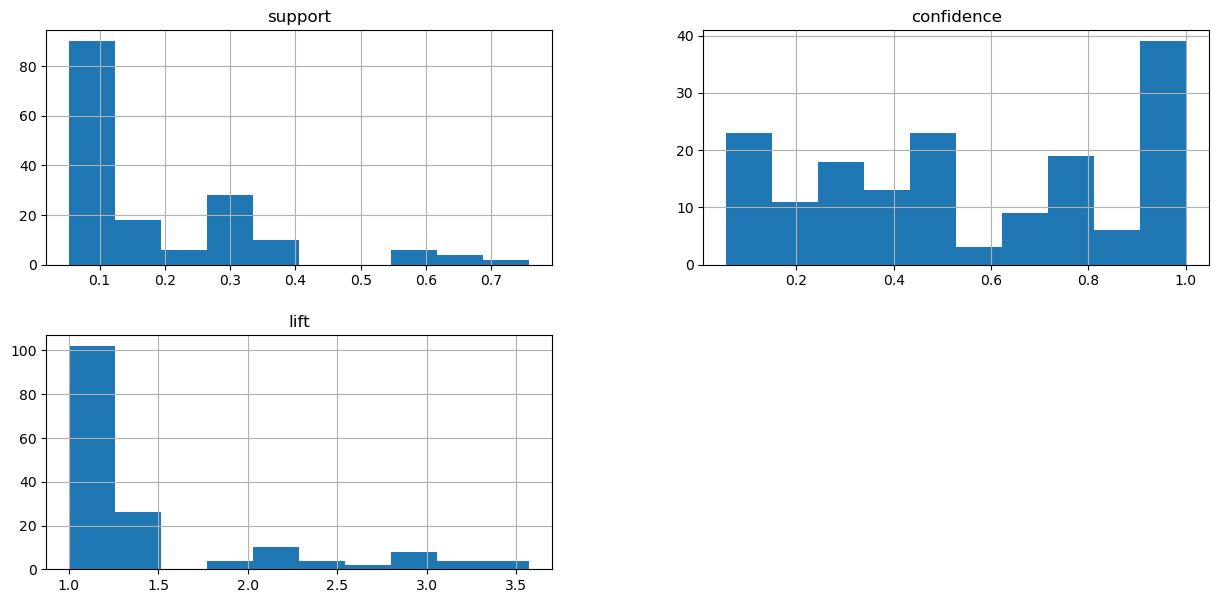

In [16]:
rule[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()